In [1]:
from utils.binaries import *
from utils.plotting import *

20:04:14 (   +2.0s) [INFO   ] -- import logging
20:04:14 (  +148ms) [INFO   ] -- import numpy as np
20:04:14 (   +12ms) [INFO   ] -- import uncertainties
20:04:14 (  +365ms) [INFO   ] -- import pandas as pd
20:04:14 (    +2ms) [INFO   ] -- import binaries.tools as tools
20:04:15 (  +718ms) [INFO   ] -- import matplotlib.pyplot as plt
20:04:15 (  +689ms) [INFO   ] -- import seaborn as so
20:04:15 (   +13ms) [DEBUG  ] -- font size set to 9.5
20:04:15 (    +1ms) [DEBUG  ] -- label size set to 13.0
20:04:15 (    +1ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
20:04:15 (    +2ms) [DEBUG  ] -- markersize set to 2.0
20:04:15 (    +1ms) [DEBUG  ] -- usetex set to False
20:04:15 (    +5ms) [INFO   ] -- import plotting.tools as plot


In [2]:
import sys
sys.path.append('/cr/data01/filip/fd-pyutils/')

In [3]:
from fdpyutils.fdEye.fdTools import getPixelVector

def get_col_row(pixel_number):

    col = int(np.ceil(pixel_number / 22.0))
    row = int(pixel_number - 22 * (col - 1))

    return row, col

def get_pixel_vector(site, telescope, pixel_number):
    return np.array(getPixelVector(site, telescope, *get_col_row(pixel_number)))

def calculate_pixel_distance(pixel1 : tuple, pixel2 : tuple):
    t1, p1, t2, p2 = *pixel1, *pixel2
    d1 = get_pixel_vector('Heat', t1, p1)
    d2 = get_pixel_vector('Coihueco', t2, p2)

    return np.linalg.norm(d1 - d2)

def get_closest_pixel(eye, pixel_number):
    minimal_distance, min_tel, min_pix = np.inf, np.nan, np.nan

    for telescope in range(1, 7):
        for pixel in range(1, 441):
            this_distance = calculate_pixel_distance((eye, pixel_number), (telescope, pixel))
            if this_distance < minimal_distance:
                min_tel, min_pix = telescope, pixel
                minimal_distance = this_distance

    return min_tel, min_pix

In [14]:
from utils.Auger.FD import PixelPlot
from matplotlib.gridspec import GridSpec

highlights = [[] for _ in range(6)]
tel = 1                             # heat 1
# tel = 2                             # heat 2
# tel = 3                             # heat 3

for pix in range(1, 441):
    itel, ipix = get_closest_pixel(tel, pix)
    highlights[itel-1].append(ipix)

/cr/users/filip/.venv/lib/python3.10/site-packages/utils/Auger/FD.py:42: RuntimeWarning: All-NaN axis encountered
  vmin = vmin if vmin is not None else np.nanmin(pixel_data)
/cr/users/filip/.venv/lib/python3.10/site-packages/utils/Auger/FD.py:43: RuntimeWarning: All-NaN axis encountered
  vmax = vmax if vmax is not None else np.nanmax(pixel_data)


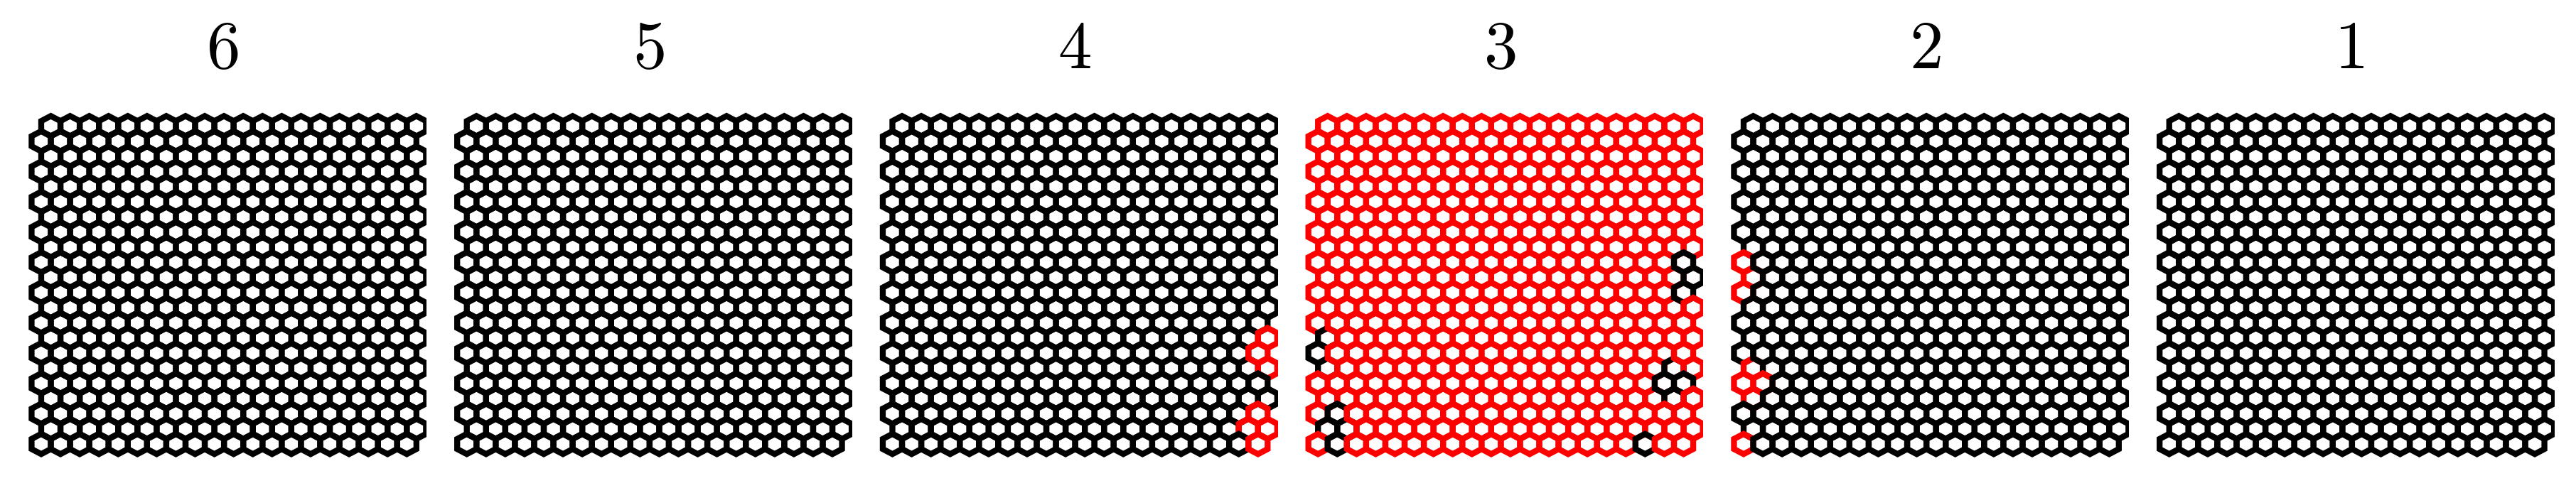

In [15]:
fig2 = plt.figure()
gs = GridSpec(1, 6, figure=fig2,)
gs.update(left=0.05, right=0.95, wspace=0.05, hspace=0.02)

for tel in range(1, 7):
    ax = fig2.add_subplot(gs[-tel])
    PixelPlot([np.nan for _ in range(440)], ax=ax, markpixels=highlights[tel-1])
    ax.set_title(tel)

In [16]:
plot.save(fig2, 'XY-heat/HeCoOverlap/heat1.png')